# Image retrieval using deep features

In [1]:
import turicreate

# Load some CIFAR-10 images

In [2]:
image_data = turicreate.SFrame('image_train_data/')

In [4]:
image_data.head()


id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


# Compute deep features from our images

In [5]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_data['deep_features'] = deep_learning_model.extract_features(image_data)

In [6]:
image_data

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


# Create a nearest neighbors model to retrieve images from deep features

In [7]:
knn_model = turicreate.nearest_neighbors.create(image_data,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

# Use image retrieval model with deep features to find similar images

In [8]:
cat = image_data[18:19]

In [10]:
cat['image'].explore()

RuntimeError: SArray.plot is currently not available for SArrays of type image

In [11]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 2.88ms       |

| Done         |         | 100         | 19.683ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.94031379506751,2
0,39777,38.46348889747021,3
0,36870,39.75596231189652,4
0,41734,39.786601414815024,5


In [12]:
def get_images_from_ids(query_result):
    return image_data.filter_by(query_result['reference_label'],'id')

In [16]:
cat_neighbors = get_images_from_ids(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 3.492ms      |

| Done         |         | 100         | 22.259ms     |

+--------------+---------+-------------+--------------+

In [19]:
type(cat_neighbors['image'])

turicreate.data_structures.sarray.SArray

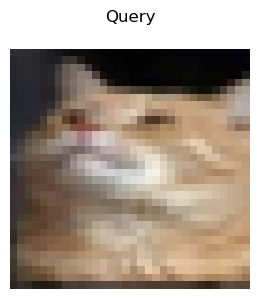

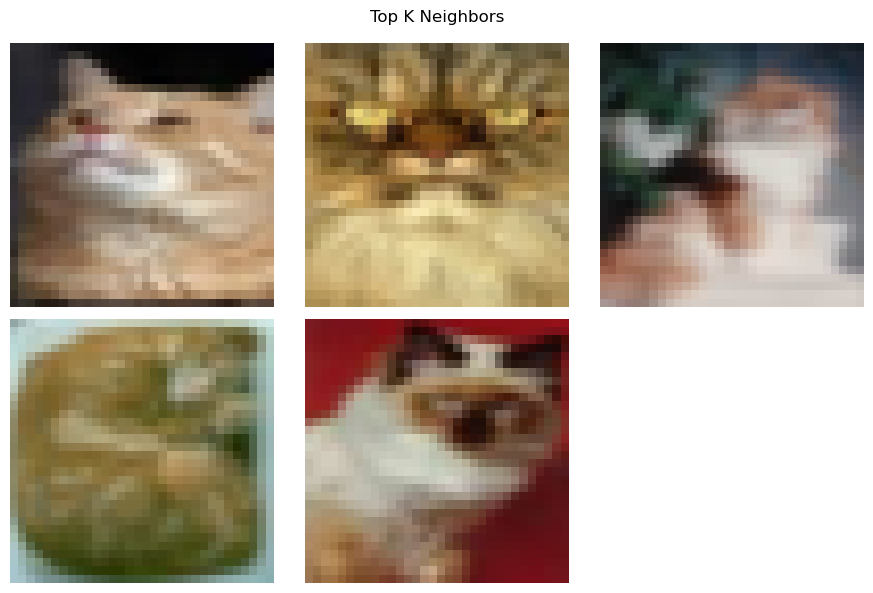

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def _to_numpy(img):
    # TuriCreate Image → numpy array
    return img.pixel_data  # works for tc.Image

def show_tc_images(sa, n=25, title=None):
    imgs = sa.head(n)
    cols = int(np.ceil(np.sqrt(len(imgs))))
    rows = int(np.ceil(len(imgs)/cols))
    plt.figure(figsize=(cols*3, rows*3))
    if title:
        plt.suptitle(title)
    for i, img in enumerate(imgs):
        arr = _to_numpy(img)
        plt.subplot(rows, cols, i+1)
        if arr.ndim == 2:
            plt.imshow(arr, cmap='gray')
        else:
            plt.imshow(arr)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example: visualize the query and its neighbors
query_img = cat['image'][0] if 'image' in cat.column_names() else cat[0]['image']
show_tc_images(turicreate.SArray([query_img]), n=1, title="Query")
show_tc_images(cat_neighbors['image'], n=25, title="Top K Neighbors")

# Find images similar to a car

In [20]:
car = image_data[8:9]

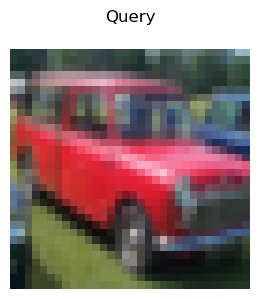

In [23]:
query_img = car['image'][0] if 'image' in car.column_names() else car[0]['image']
show_tc_images(turicreate.SArray([query_img]), n=1, title="Query")

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 2.891ms      |

| Done         |         | 100         | 19.822ms     |

+--------------+---------+-------------+--------------+

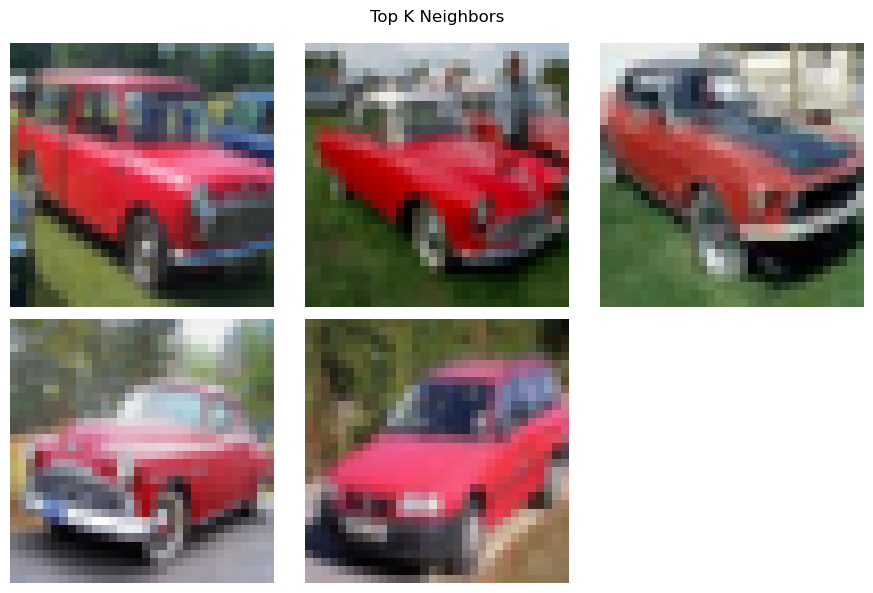

In [24]:
show_tc_images(get_images_from_ids(knn_model.query(car))['image'], n=25, title="Top K Neighbors")

# Create a lambda function to find and show nearest neighbors to an image

In [27]:
show_neighbors = lambda i: show_tc_images(get_images_from_ids(knn_model.query(image_data[i:i+1]))['image'],n=25, title="Top K Neighbors")

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 4.403ms      |

| Done         |         | 100         | 20.021ms     |

+--------------+---------+-------------+--------------+

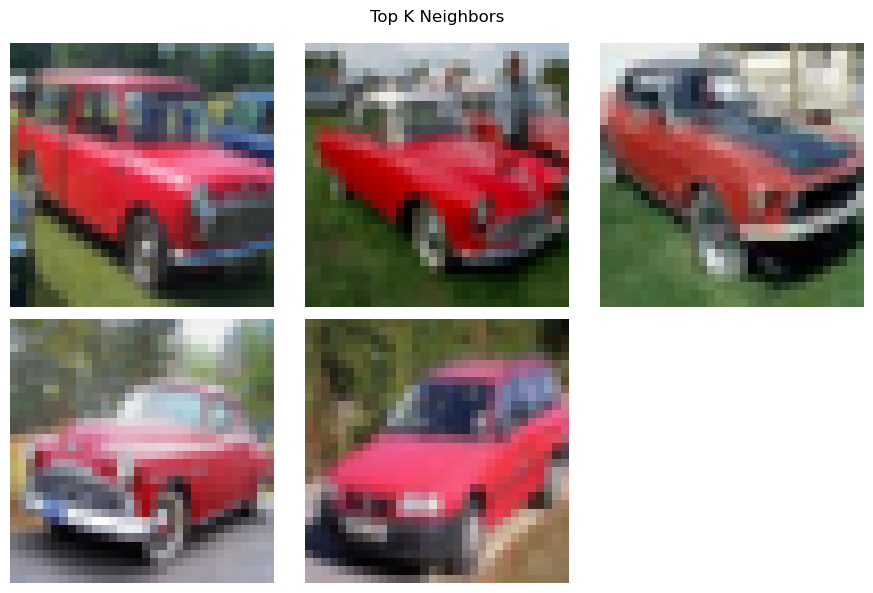

In [28]:
show_neighbors(8)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 5.035ms      |

| Done         |         | 100         | 20.549ms     |

+--------------+---------+-------------+--------------+

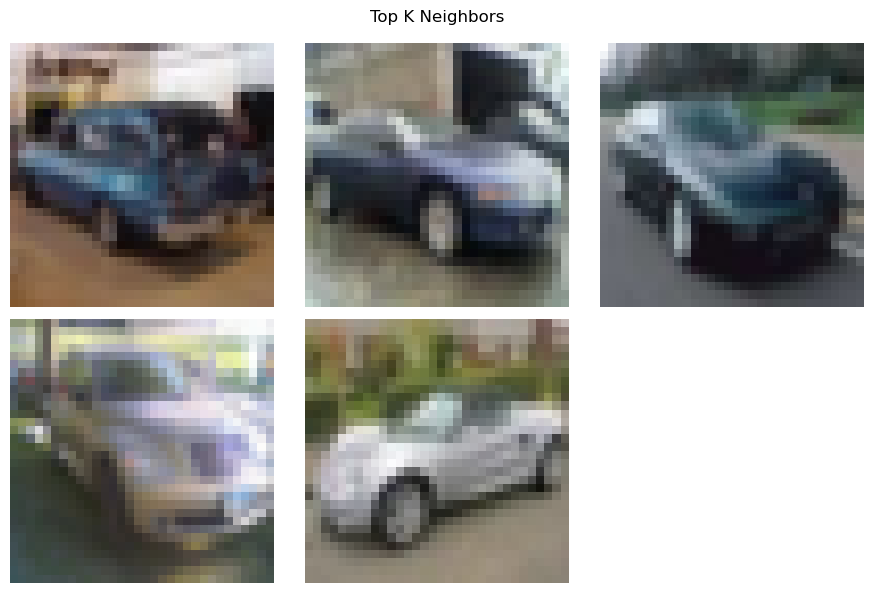

In [29]:
show_neighbors(26)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 3.081ms      |

| Done         |         | 100         | 20.538ms     |

+--------------+---------+-------------+--------------+

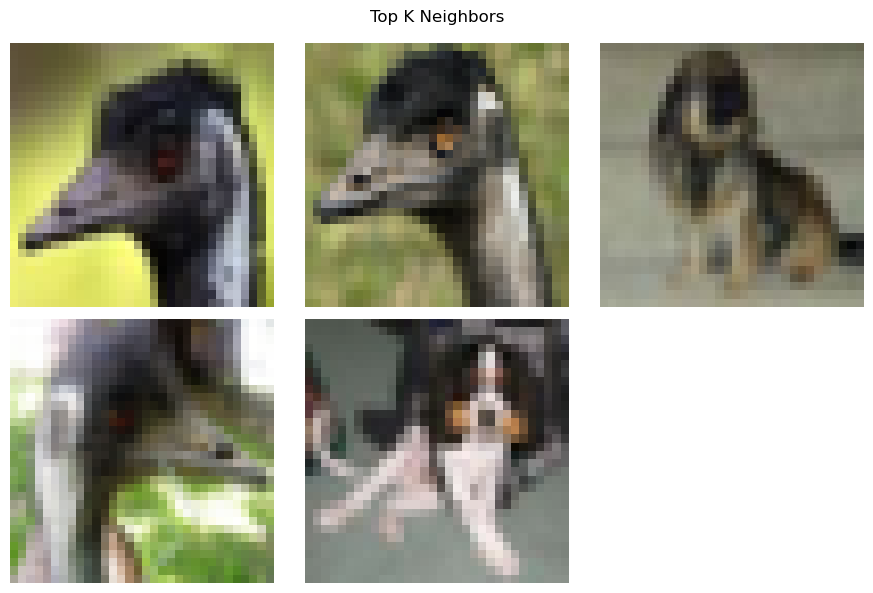

In [30]:
show_neighbors(500)

In [31]:
sketch = turicreate.Sketch(image_data['label'])

In [32]:
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [49]:
data_dog = image_data[image_data['label']=='dog']

dog_model = turicreate.nearest_neighbors.create(data_dog,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [50]:
cat_data = image_data[image_data['label']=='cat']

cat_model = turicreate.nearest_neighbors.create(cat_data,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [51]:
data_auto = image_data[image_data['label']=='automobile']

auto_model = turicreate.nearest_neighbors.create(data_auto,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [52]:
data_bird = image_data[image_data['label']=='bird']

bird_model = turicreate.nearest_neighbors.create(data_bird,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [45]:
def get_label_from_ids(query_result):
    return image_data.filter_by(query_result['reference_label'],'reference_label')

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 2.125ms      |

| Done         |         | 100         | 6.501ms      |

+--------------+---------+-------------+--------------+

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 3.075ms      |

| Done         |         | 100         | 21.142ms     |

+--------------+---------+-------------+--------------+

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 1.477ms      |

| Done         |         | 100         | 5.353ms      |

+--------------+---------+-------------+--------------+

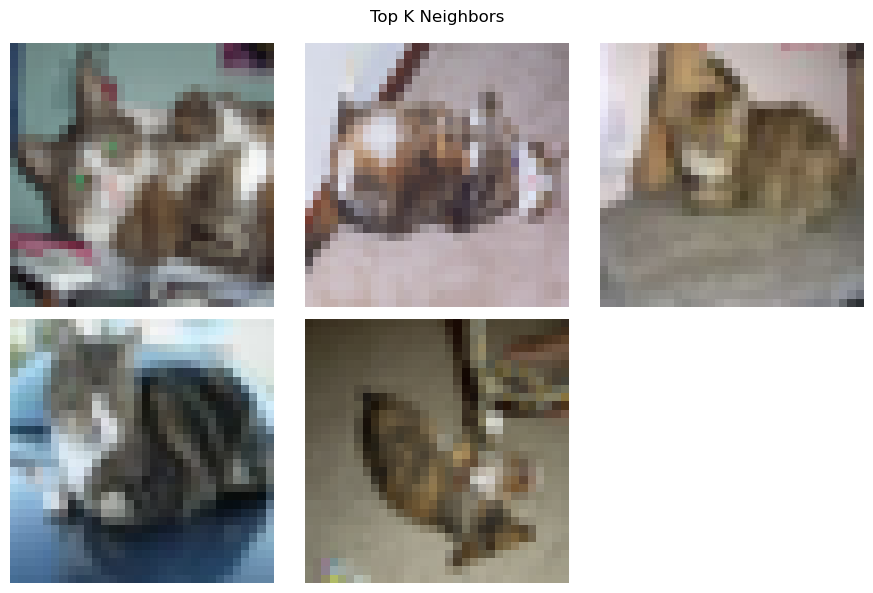

In [90]:
image_test = turicreate.SFrame('image_test_data/')
cat_model.query(image_test[0:1])
cat_neighbors = get_images_from_ids(knn_model.query(cat))
show_tc_images(get_images_from_ids(cat_model.query(image_test[0:1]))['image'], n=10, title="Top K Neighbors")

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 1.101ms      |

| Done         |         | 100         | 5.282ms      |

+--------------+---------+-------------+--------------+

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 871us        |

| Done         |         | 100         | 4.995ms      |

+--------------+---------+-------------+--------------+

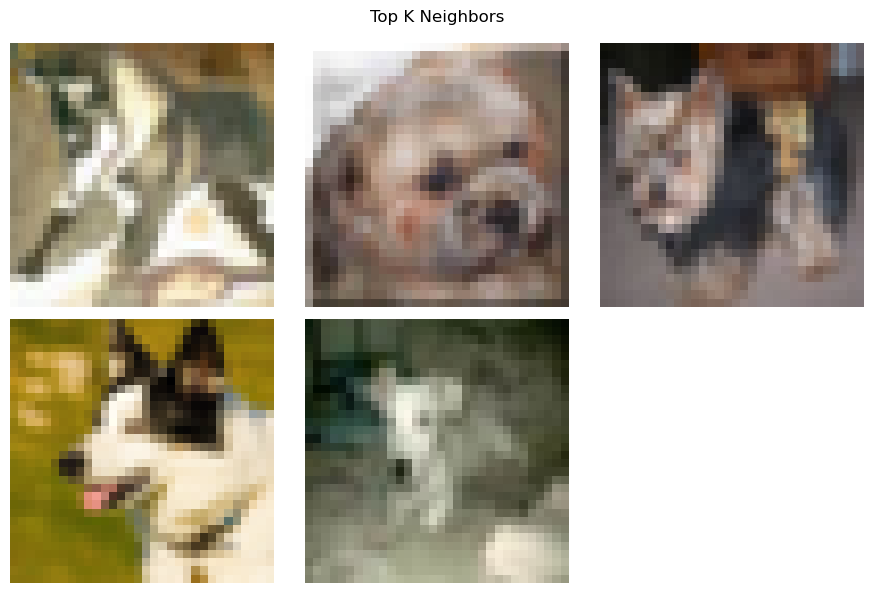

In [92]:
dog_model.query(image_test[0:1])
show_tc_images(get_images_from_ids(dog_model.query(image_test[0:1]))['image'], n=10, title="Top K Neighbors")

In [57]:
mean_dist_cat = cat_model.query(image_test[0:1], k = 5)['distance'].mean()
mean_dist_cat

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 570us        |

| Done         |         | 100         | 6.494ms      |

+--------------+---------+-------------+--------------+

36.15573070978294

In [58]:
mean_dist_dog = dog_model.query(image_test[0:1], k = 5)['distance'].mean()
mean_dist_dog

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 1.228ms      |

| Done         |         | 100         | 5.878ms      |

+--------------+---------+-------------+--------------+

37.77071136184157

In [59]:
image_test

id,image,label,deep_features,image_array
0,Height: 32 Width: 32,cat,"[1.1346900463104248, 0.0,0.0, 0.0, ...","[158.0, 112.0, 49.0,159.0, 111.0, 47.0, ..."
6,Height: 32 Width: 32,automobile,"[0.2313588261604309, 0.0,0.0, 0.0, 0.0, ...","[160.0, 37.0, 13.0,185.0, 49.0, 11.0, 20 ..."
8,Height: 32 Width: 32,cat,"[0.0, 0.0,0.034419238567352295, ...","[23.0, 19.0, 23.0, 19.0,21.0, 28.0, 21.0, 16.0, ..."
9,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 11.6065092086792, ...","[217.0, 215.0, 209.0,210.0, 208.0, 202.0, ..."
12,Height: 32 Width: 32,dog,"[0.3223174810409546, 0.0,1.2493335008621216, 0.0, ...","[91.0, 64.0, 30.0, 82.0,58.0, 30.0, 87.0, 73.0, ..."
16,Height: 32 Width: 32,dog,"[0.0, 0.0,0.34735703468322754, ...","[95.0, 76.0, 78.0, 92.0,77.0, 78.0, 89.0, 77.0, ..."
24,Height: 32 Width: 32,dog,"[1.3155765533447266, 0.0,0.0, 0.0, 0.0, 0.0, ...","[136.0, 134.0, 118.0,142.0, 141.0, 126.0, ..."
25,Height: 32 Width: 32,bird,"[0.0,0.31728875637054443, ...","[100.0, 103.0, 74.0,68.0, 91.0, 65.0, 116.0, ..."
31,Height: 32 Width: 32,dog,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 9.260188102722168, ...","[127.0, 130.0, 81.0,130.0, 133.0, 88.0, ..."
33,Height: 32 Width: 32,dog,"[0.1307867169380188,0.7276672124862671, 0.0, ...","[118.0, 113.0, 81.0,122.0, 117.0, 83.0, ..."


In [61]:
image_test_cat = image_test[image_test['label'] == 'cat']
image_test_dog = image_test[image_test['label'] == 'dog']
image_test_bird = image_test[image_test['label'] == 'bird']
image_test_automobile = image_test[image_test['label'] == 'automobile']

In [65]:
dog_cat_neighbors = cat_model.query(image_test_dog, k=1)
dog_automobile_neighbors = auto_model.query(image_test_dog, k=1)
dog_bird_neighbors = bird_model.query(image_test_dog, k=1)
dog_dog_neighbors = dog_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 32

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 16000   | 3.14342     | 40.009ms     |

| Done         | 509000  | 100         | 74.162ms     |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 32

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 16000   | 3.14342     | 43.39ms      |

| Done         | 509000  | 100         | 75.495ms     |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 32

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 15000   | 3.13808     | 42.639ms     |

| Done         | 478000  | 100         | 73.978ms     |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 32

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 16000   | 3.14342     | 40.72ms      |

| Done         | 509000  | 100         | 72.689ms     |

+--------------+---------+-------------+--------------+

In [63]:
dog_cat_neighbors

query_label,reference_label,distance,rank
0,33,36.419607706754384,1
1,30606,38.83532688735542,1
2,5545,36.97634108541546,1
3,19631,34.575007291446106,1
4,7493,34.77882479101661,1
5,47044,35.11715782924591,1
6,13918,40.60958309132649,1
7,10981,39.90368673062214,1
8,45456,38.067470016821176,1
9,44673,42.72587329506032,1


In [66]:
dog_automobile_neighbors

query_label,reference_label,distance,rank
0,33859,41.95797614571203,1
1,2046,46.00213318067788,1
2,19594,42.946229069238804,1
3,11000,41.68660600484793,1
4,19594,39.22696649347584,1
5,49314,40.58451176980721,1
6,40822,45.10673529610854,1
7,44997,41.32211409739762,1
8,33859,41.82446549950164,1
9,33859,45.497692940110376,1


In [67]:
dog_bird_neighbors

query_label,reference_label,distance,rank
0,44658,41.75386473035126,1
1,9215,41.3382958924861,1
2,36675,38.615759085289056,1
3,12582,37.08922699538214,1
4,36122,38.27228869398105,1
5,8736,39.146208923590486,1
6,38991,40.523040105962316,1
7,44177,38.19479183926956,1
8,4549,40.156713166131446,1
9,40225,45.55979626027668,1


In [68]:
dog_dog_neighbors

query_label,reference_label,distance,rank
0,49803,33.47735903726335,1
1,5755,32.84584956840554,1
2,20715,35.03970731890584,1
3,13387,33.90103276968193,1
4,12089,37.484925090925636,1
5,6094,34.94516534398124,1
6,3431,39.095727834463545,1
7,6184,37.76961310322034,1
8,2167,35.10891446032838,1
9,7776,43.242283258453455,1


In [70]:
dog_distances = turicreate.SFrame()

In [71]:
dog_distances['dog_dog'] =  dog_dog_neighbors['distance']

In [72]:
dog_distances['dog_cat'] =  dog_cat_neighbors['distance']

In [73]:
dog_distances['dog_automobile'] =  dog_automobile_neighbors['distance']

In [75]:
dog_distances['dog_bird'] =  dog_bird_neighbors['distance']

In [76]:
dog_distances

dog_dog,dog_cat,dog_automobile,dog_bird
33.47735903726335,36.419607706754384,41.95797614571203,41.75386473035126
32.84584956840554,38.83532688735542,46.00213318067788,41.3382958924861
35.03970731890584,36.97634108541546,42.946229069238804,38.615759085289056
33.90103276968193,34.575007291446106,41.68660600484793,37.08922699538214
37.484925090925636,34.77882479101661,39.22696649347584,38.27228869398105
34.94516534398124,35.11715782924591,40.58451176980721,39.146208923590486
39.095727834463545,40.60958309132649,45.10673529610854,40.523040105962316
37.76961310322034,39.90368673062214,41.32211409739762,38.19479183926956
35.10891446032838,38.067470016821176,41.82446549950164,40.156713166131446
43.242283258453455,42.72587329506032,45.497692940110376,45.55979626027668


In [79]:
def is_dog_correct(row):
    min = 1000000
    for i in row:
        if row[i] < min:
            min = row[i]
    if row['dog_dog'] > min:
        return 0
    else:
        return 1

In [80]:
dog_distances.apply(is_dog_correct).sum()

Using default 16 lambda workers.

To maximize the degree of parallelism, add the following code to the beginning of the program:

"turicreate.config.set_runtime_config('TURI_DEFAULT_NUM_PYLAMBDA_WORKERS', 32)"

Note that increasing the degree of parallelism also increases the memory footprint.

678

In [85]:
dog_distances.apply(is_dog_correct).sum()/dog_distances.num_rows()

0.678